In [96]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from currency_converter import CurrencyConverter
sns.set()

In [97]:
rio = pd.read_csv('../classifying/classified_rio.csv').rename(columns={'r$_pmo':'price'})
mumbai = pd.read_csv('../classifying/classified_mumbai.csv')
hyderabad = pd.read_csv('../classifying/classified_hyderabad.csv')
chennai = pd.read_csv('../classifying/classified_chennai.csv')
newdelhi = pd.read_csv('../classifying/classified_delhi.csv')

rent_index = pd.read_csv('../classifying/city_rent_index.csv')
rent_index.dropna(inplace=True)

In [98]:
mumbai.dropna(subset=['price'], inplace=True)
hyderabad.dropna(subset=['price'], inplace=True)
chennai.dropna(subset=['price'], inplace=True)
newdelhi.dropna(subset=['price'], inplace=True)

### Standardizing Prices

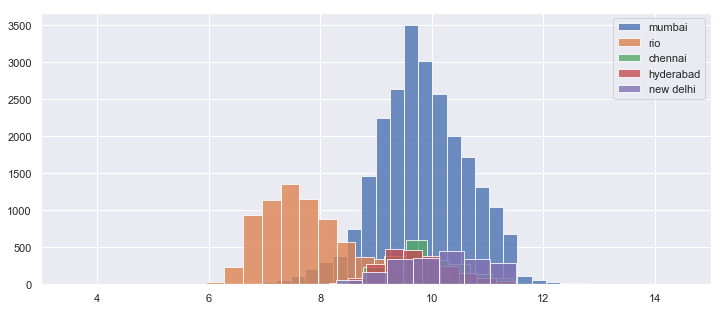

In [99]:
plt.figure(figsize=(12,5))
mumbai['price'].apply(np.log).hist(bins=50, label='mumbai', alpha=.8)
rio['price'].apply(np.log).hist(bins=30, label='rio', alpha=.8)
chennai['price'].apply(np.log).hist(bins=10, label='chennai', alpha=.8)
hyderabad['price'].apply(np.log).hist(bins=10, label='hyderabad', alpha=.8)
newdelhi['price'].apply(np.log).hist(bins=8, label='new delhi', alpha=.8)
plt.xlim(3, 15)
plt.legend();

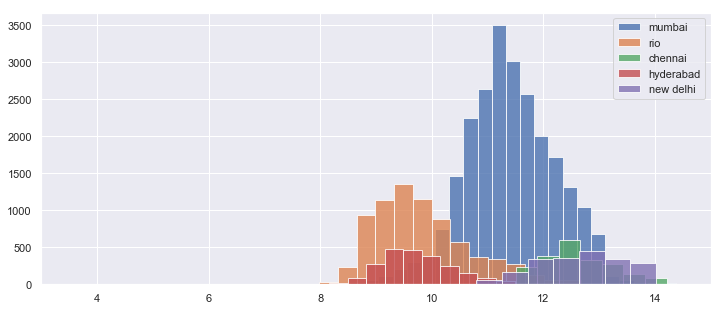

In [100]:
# CITY RENT INDEX ADJUSTMENT

index_type = 'Rent Index'

rio_factor = 100/rent_index[rent_index['City']=='Rio de Janeiro, Brazil'][index_type].values[0]
mumbai_factor = 100/rent_index[rent_index['City']=='Mumbai, India'][index_type].values[0]
hyderabad_factor = 100/rent_index[rent_index['City']=='Hyderabad, India'][index_type].values[0]
chennai_factor = 100/rent_index[rent_index['City']=='Chennai, India'][index_type].values[0]
nd_factor = 100/rent_index[rent_index['City']=='Delhi, India'][index_type].values[0]

rio['price'] = rio_factor*rio['price']
mumbai['price'] = mumbai_factor*mumbai['price']
chennai['price'] = chennai_factor*chennai['price']
newdelhi['price'] = nd_factor*newdelhi['price']

plt.figure(figsize=(12,5))
mumbai['price'].apply(np.log).hist(bins=50, label='mumbai', alpha=.8)
rio['price'].apply(np.log).hist(bins=30, label='rio', alpha=.8)
chennai['price'].apply(np.log).hist(bins=10, label='chennai', alpha=.8)
hyderabad['price'].apply(np.log).hist(bins=10, label='hyderabad', alpha=.8)
newdelhi['price'].apply(np.log).hist(bins=8, label='new delhi', alpha=.8)
plt.xlim(3, 15)
plt.legend();

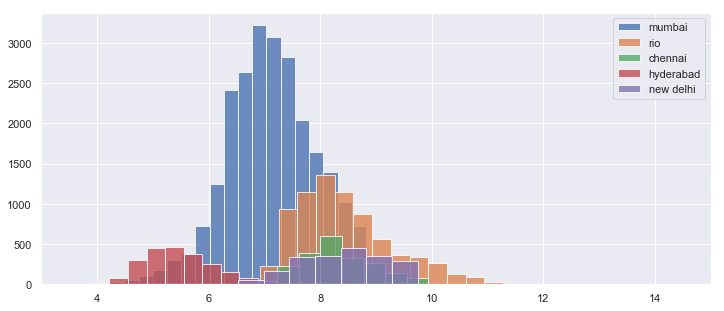

In [101]:
# CONVERT TO USD

cc = CurrencyConverter()
def ConvINR(x):
    return round(cc.convert(x, 'INR', 'USD'))
def ConvBRL(x):
    return round(cc.convert(x, 'BRL', 'USD'))

rio['price'] = rio['price'].apply(ConvBRL)
mumbai['price'] = mumbai['price'].apply(ConvINR)
hyderabad['price'] = hyderabad['price'].apply(ConvINR)
chennai['price'] = chennai['price'].apply(ConvINR)
newdelhi['price'] = newdelhi['price'].apply(ConvINR)

plt.figure(figsize=(12,5))
mumbai['price'].apply(np.log).hist(bins=50, label='mumbai', alpha=.8)
rio['price'].apply(np.log).hist(bins=30, label='rio', alpha=.8)
chennai['price'].apply(np.log).hist(bins=10, label='chennai', alpha=.8)
hyderabad['price'].apply(np.log).hist(bins=10, label='hyderabad', alpha=.8)
newdelhi['price'].apply(np.log).hist(bins=8, label='new delhi', alpha=.8)
plt.xlim(3, 15)
plt.legend();

Apply log transform on price:

In [102]:
for df in [rio, mumbai, hyderabad, chennai, newdelhi]:
    df['price'] = df['price'].apply(np.log)

In [103]:
rio.to_csv('rio_normalized.csv', index=False)
mumbai.to_csv('mumbai_normalized.csv', index=False)
hyderabad.to_csv('hyderabad_normalized.csv', index=False)
chennai.to_csv('chennai_normalized.csv', index=False)
newdelhi.to_csv('delhi_normalized.csv', index=False)